 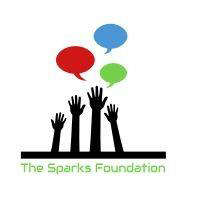
  
# Task- 3 : To Explore Unsupervised Machine Learning



 From the given ‘Iris’ dataset, we have to predict the optimum number of clusters and represent it visually.

# Importing the required libaries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans 
%matplotlib inline

# Dataset

In [65]:
iris_data=pd.read_csv('Iris.csv')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Finding the dimension of the dataset

In [66]:
iris_data.shape

(150, 6)

Finding if the data contains any null value or not 

In [67]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# We try to gain more information about the data

Checking all the statics of the data

In [68]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We convert the categorical features 

In [70]:
label_encode=LabelEncoder()
iris_data['Species']=label_encode.fit_transform(iris_data['Species'])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


We see there are 3 distinct Species so ideally we should have 3 clusters

In [72]:
iris_data['Species'].unique()

array([0, 1, 2], dtype=int64)

# Visualizing the Data

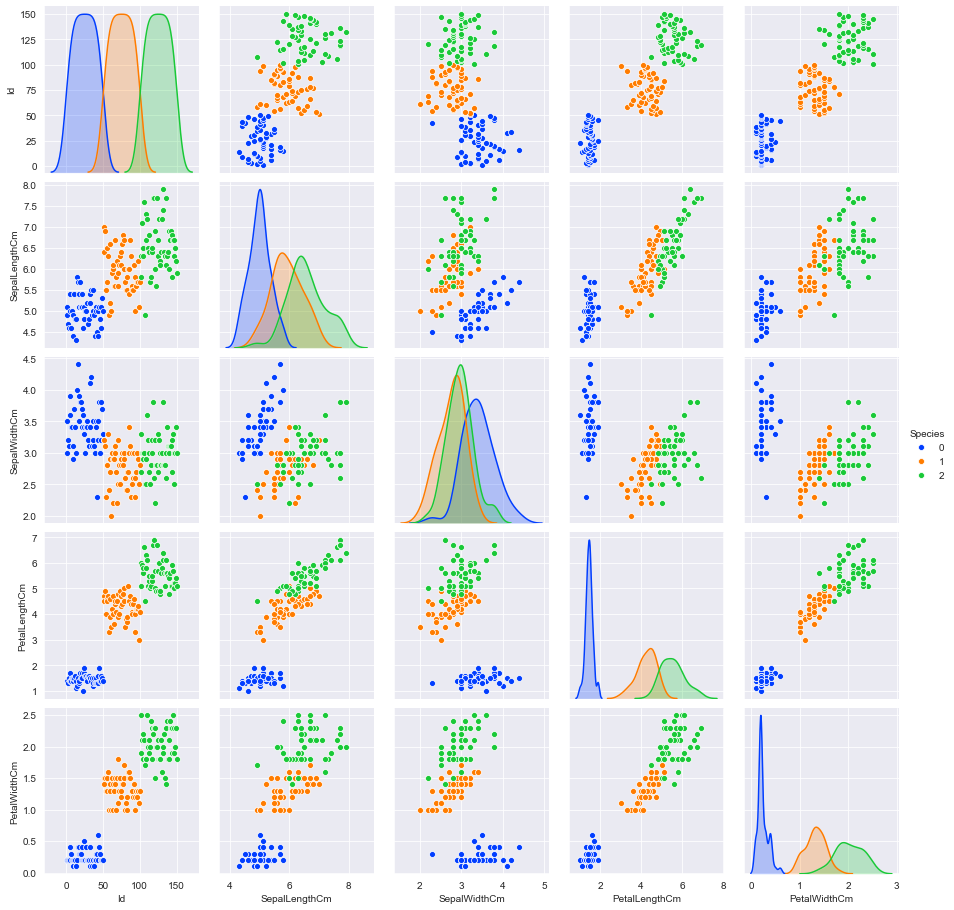

In [79]:
sns.pairplot(data=iris_data, hue='Species',palette='bright')

Finding the relation between the features

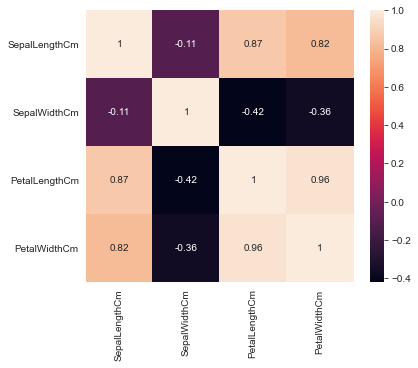

In [80]:
df=iris_data.iloc[:,1:-1]
corr=df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True)
plt.show()

# Preparing the Data

First, dropping the ID feature

Selecting the dependent features

As, We would use K-means Clustering we would have to scale the data but here all the dependent features are of same unit

In [81]:
iris_data.drop(['Id'],axis=1,inplace=True)
x=iris_data.iloc[:,:-1].values

To Find the optimum number of cluser (K) we'll use: 
# Elbow method

Here, we find the sum of squares within cluster (WCSS) for differnt number of cluster 
We choose the number where the WCSS stops declining drastically

In [82]:
wcss=[]

for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)
print(wcss)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.930963049671746, 35.14439095896475, 29.961863114955225, 27.935658850952983, 26.12513383838385, 24.632091136933244, 22.630459383753504, 21.639298988421285, 20.64710461760463]


Let us visualize to understand better

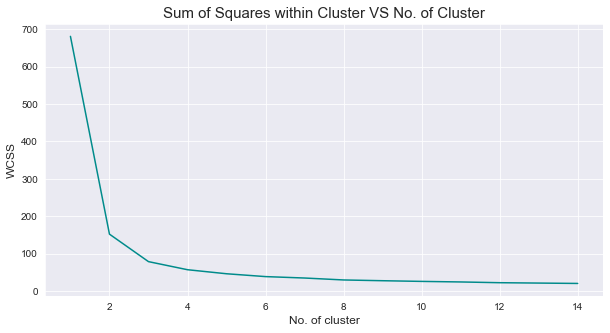

In [83]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss,color='darkcyan')
plt.title('Sum of Squares within Cluster VS No. of Cluster',size=15)
plt.xlabel('No. of cluster',size=12)
plt.ylabel('WCSS',size=12)
plt.show()

Here, we see the linegraph stops decreasing significantly after 3. It's a gradual decrease after that.
So, we choose no. of cluster = 3

Applying K-means classifier to the Model

In [84]:
kmeans=KMeans(n_clusters=3)
classifier=kmeans.fit_predict(x)

Comparing the clusters we have made with the species

In [91]:
df1=iris_data.copy()
df1['Cluster']=classifier
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


# Visualizing the Clusters

 For the features Sepal length and Petal length

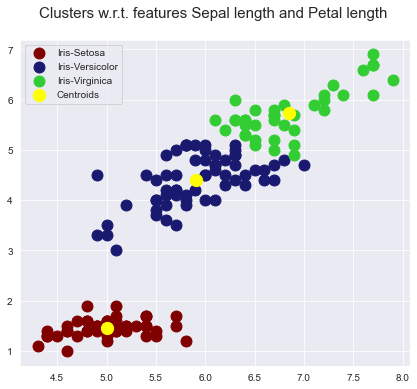

In [109]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal length and Petal length \n',size=15)

plt.scatter(x[classifier==0,0],x[classifier==0,2],s=120,c='maroon',label='Iris-Setosa')
plt.scatter(x[classifier==1,0],x[classifier==1,2],s=120,c='midnightblue',label='Iris-Versicolor')
plt.scatter(x[classifier==2,0],x[classifier==2,2],s=120,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=150,c='yellow',label='Centroids')

plt.legend()
plt.show()

For the features Sepal width and Petal width

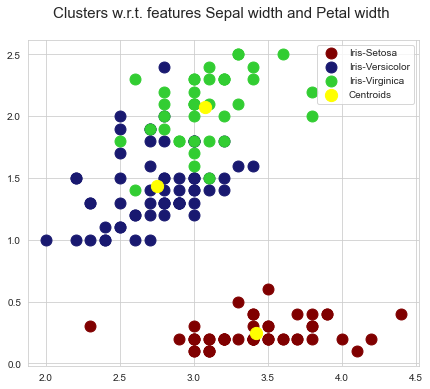

In [110]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal width and Petal width \n',size=15)

plt.scatter(x[classifier==0,1],x[classifier==0,3],s=120,c='maroon',label='Iris-Setosa')
plt.scatter(x[classifier==1,1],x[classifier==1,3],s=120,c='midnightblue',label='Iris-Versicolor')
plt.scatter(x[classifier==2,1],x[classifier==2,3],s=120,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,3],s=150,c='yellow',label='Centroids')

plt.legend()
plt.show()

For the features Sepal length and Sepal width

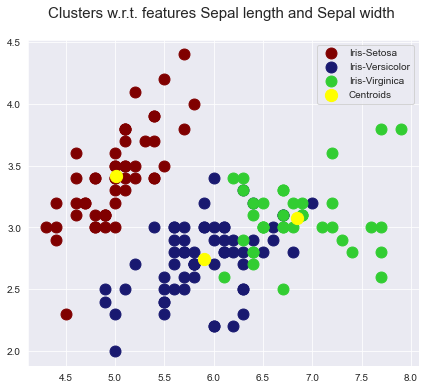

In [111]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t. features Sepal length and Sepal width \n',size=15)

plt.scatter(x[classifier==0,0],x[classifier==0,1],s=120,c='maroon',label='Iris-Setosa')
plt.scatter(x[classifier==1,0],x[classifier==1,1],s=120,c='midnightblue',label='Iris-Versicolor')
plt.scatter(x[classifier==2,0],x[classifier==2,1],s=120,c='limegreen',label='Iris-Virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c='yellow',label='Centroids')

plt.legend()
plt.show()

--------------------------------

# Made by Bishal Paul